# Import the required modules

In [5]:
pip install fpdf

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40705 sha256=e5b073ee6e707a8bc6ac72ccd492773e874533fcc28ba521ad1277d73eac3c47
  Stored in directory: c:\users\poni3001\appdata\local\pip\cache\wheels\44\35\8b\86ce00cec7e4d13c5f189680ae0fa82f919bedc066c2cddae9
Successfully built fpdf
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tkinter



In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


# Load pre-trained VGG16 model (without the top classification layer)



In [10]:
base_model_nikhil = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers

In [11]:
for layer in base_model_nikhil.layers:
    layer.trainable = False

# # Add a new classification layer


In [12]:
x = Flatten()(base_model_nikhil.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

#  Define the new model


In [13]:
model_nikhil = Model(inputs=base_model_nikhil.input, outputs=predictions)


# Compile the model


In [14]:
model_nikhil.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Create a data generator for loading images


In [15]:
train_data = ImageDataGenerator(rescale=1./255)
train_generator_nikhil = train_data.flow_from_directory(r'C:\Users\poni3001\Downloads\sketch', target_size=(224, 224), batch_size=16, class_mode='categorical')


Found 370 images belonging to 6 classes.


# Train the model


In [16]:
model_nikhil.fit(train_generator_nikhil, epochs=4)

Epoch 1/4
24/24 [==============================] - 65s 3s/step - loss: 1.2613 - accuracy: 0.8432
Epoch 2/4
24/24 [==============================] - 76s 3s/step - loss: 0.0209 - accuracy: 0.9892
Epoch 3/4
24/24 [==============================] - 71s 3s/step - loss: 0.0037 - accuracy: 0.9973
Epoch 4/4
24/24 [==============================] - 72s 3s/step - loss: 4.2845e-05 - accuracy: 1.0000


In [17]:
import pickle

In [18]:
pickle.dump(model_nikhil, open(r'C:\Users\poni3001\Downloads\model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_10
......vars
.........0
.........1
...layers\conv2d_11
......vars
.........0
.........1
...layers\conv2d_12
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\conv2d_4
......vars
.........0
.........1
...layers\conv2d_5
......vars
.........0
.........1
...layers\conv2d_6
......vars
.........0
.........1
...layers\conv2d_7
......vars
.........0
.........1
...layers\conv2d_8
......vars
.........0
.........1
...layers\conv2d_9
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\input_layer
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d

# Test dataset

In [91]:
test_generator_nikhil = train_data.flow_from_directory(r'C:\Users\NIKHIL LOKESH\Desktop\testingsketch', target_size=(224, 224), batch_size=16, class_mode='categorical')


Found 0 images belonging to 0 classes.


# Evaluate the model

In [74]:
model_nikhil.evaluate(test_generator_nikhil)

1/1 [==============================] - 1s 947ms/step - loss: 2.1774e-05 - accuracy: 1.0000


[2.177416899939999e-05, 1.0]

In [10]:
 pip install -U opencv-contrib-python

     ---------------------------------------- 44.9/44.9 MB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


176 200
[[  0   0 642 727]
 [159 205 116   1]
 [158 279 120   3]
 ...
 [326 155 308 338]
 [313 152 324 343]
 [313 152 321 343]]
Total Number of Region Proposals: 2772


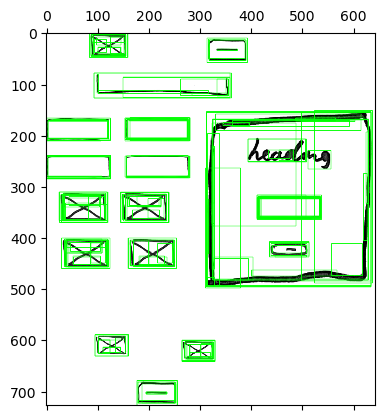

In [34]:
import sys
import cv2
import matplotlib.pyplot as plt
 
if __name__ == '__main__':
    if len(sys.argv) < 3:
        print(__doc__)
        sys.exit(1)
    cv2.setUseOptimized(True);
    cv2.setNumThreads(4);
 
    im_nikhil = cv2.imread(r'C:\Users\poni3001\Downloads\sketchtest.png')
    newHeight = 200
    rects1_nikhil=[]
    newWidth = int(im_nikhil.shape[1]*200/im_nikhil.shape[0])
    print(newWidth, newHeight)
 
    ss_nikhil = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
 
    ss_nikhil.setBaseImage(im_nikhil)
 
   
    ss_nikhil.switchToSelectiveSearchQuality()
   
 
    rects_nikhil = ss_nikhil.process()
    print(rects_nikhil)
    print('Total Number of Region Proposals: {}'.format(len(rects_nikhil)))
 
    numShowRects_nikhil = 200
    increment = 50
    imOut = im_nikhil.copy()
    imOut1=im_nikhil.copy()
    shapex,shapey,_=im_nikhil.shape
    for i, rect in enumerate(rects_nikhil):
        if (i < numShowRects_nikhil):
            x, y, w, h = rect
            if(w*h>0):
                rects1_nikhil.append([x,y,w,h])
                cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        else:
            break
    plt.matshow(imOut)
    
    
 
    

In [35]:
import numpy as np
boxes=[]
for i in rects_nikhil:
    a=[i[0],i[1],i[0]+i[2],i[1]+i[3]]
    a=np.array(a)
    boxes.append(a)
boxes=np.array(boxes)
boxes

array([[  0,   0, 642, 727],
       [159, 205, 275, 206],
       [158, 279, 278, 282],
       ...,
       [326, 155, 634, 493],
       [313, 152, 637, 495],
       [313, 152, 634, 495]])

In [36]:
def NMS(boxes, treshold):
    if len(boxes) == 0:
        return []
    x1 = boxes[:, 0]  
    y1 = boxes[:, 1]  
    x2 = boxes[:, 2]  
    y2 = boxes[:, 3] 
    
    areas = (x2 - x1 + 1) * (y2 - y1 + 1) 
    indices = np.arange(len(x1))
    for i,box in enumerate(boxes):
        temp_indices = indices[indices!=i]
        xx1 = np.maximum(box[0], boxes[temp_indices,0])
        yy1 = np.maximum(box[1], boxes[temp_indices,1])
        xx2 = np.minimum(box[2], boxes[temp_indices,2])
        yy2 = np.minimum(box[3], boxes[temp_indices,3])
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / areas[temp_indices]
        if np.any(overlap) > treshold:
            indices = indices[indices != i]
    return boxes[indices].astype(int)
boxes=NMS(boxes, 0.6)
boxes

array([[  3, 240, 123, 282],
       [100,  86, 359, 126],
       [102, 596, 149, 625],
       [317,  11, 393,  57],
       [268, 603, 327, 639],
       [156, 243, 277, 283],
       [149, 313, 236, 367],
       [ 29, 312, 113, 365],
       [ 86,   1, 156,  45],
       [182, 683, 253, 723],
       [166, 404, 251, 458],
       [  1, 166, 125, 210],
       [156, 167, 278, 210],
       [ 34, 403, 120, 457],
       [313, 152, 634, 495]])

In [37]:
shapex,shapey,_=im_nikhil.shape # Print image shape

 

#x  up to down
#y left to right
print(boxes)
cv2.imshow("image", imOut1)
newdata=[]
for x1, y1, x2, y2 in boxes:
    x1,y1,x2,y2=x1-1 , y1-1 , x2+1 , y2+1
    #imgg=im[y1:y2,x1:x2]
    #path="C:\\Users\\NIKHIL LOKESH\\Desktop\\sketch3\\text\\txt"+str(x1)+".png"
    #cv2.imwrite(path,imgg)
    cv2.rectangle(imOut1, (x1, y1), (x2,y2), (0, 255, 0), 1, cv2.LINE_AA)
    
cv2.imshow("image", imOut1)


k = cv2.waitKey(0) & 0xFF
if k == 113:
    cv2.destroyAllWindows()

[[  3 240 123 282]
 [100  86 359 126]
 [102 596 149 625]
 [317  11 393  57]
 [268 603 327 639]
 [156 243 277 283]
 [149 313 236 367]
 [ 29 312 113 365]
 [ 86   1 156  45]
 [182 683 253 723]
 [166 404 251 458]
 [  1 166 125 210]
 [156 167 278 210]
 [ 34 403 120 457]
 [313 152 634 495]]


boxes dimensions [[  3 240 123 282]
 [100  86 359 126]
 [102 596 149 625]
 [317  11 393  57]
 [268 603 327 639]
 [156 243 277 283]
 [149 313 236 367]
 [ 29 312 113 365]
 [ 86   1 156  45]
 [182 683 253 723]
 [166 404 251 458]
 [  1 166 125 210]
 [156 167 278 210]
 [ 34 403 120 457]
 [313 152 634 495]]
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 

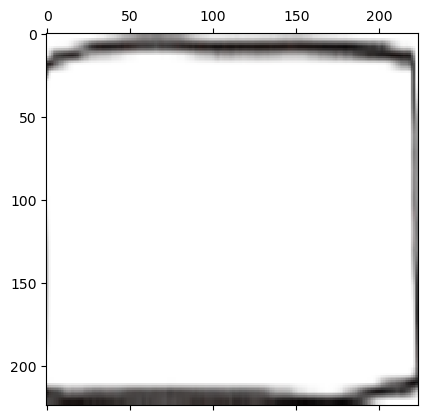

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
imOut=im_nikhil.copy()

xtest=[]
print("boxes dimensions",boxes)
for x1, y1, x2, y2 in boxes:
    x1,y1,x2,y2=x1 , y1 , x2 , y2
    """if(x1>1):
        x1-=1
    if(x2<shapex-1):
        x2+=1
    if(y1>1):
        y1-=1
    if(y2<shapey-1):
        y2+=1"""
    imgg=im_nikhil[y1:y2,x1:x2]
    imgg=cv2.resize(imgg,(224,224))
    #filename="C:\\Users\\NIKHIL LOKESH\\Desktop\\testingsketch\\im"+str(x1)+".png"
    #print(filename)
    ##cv2.imwrite(filename, imgg)
    
    cv2.imshow("test",imgg)
    
    print(imgg.shape)
    xtest.append(imgg)
k = cv2.waitKey(0) & 0xFF
if k == 113:
    cv2.destroyAllWindows()
plt.matshow(xtest[0])

xtest=np.array(xtest)
print(xtest[3])

(224, 224, 3)

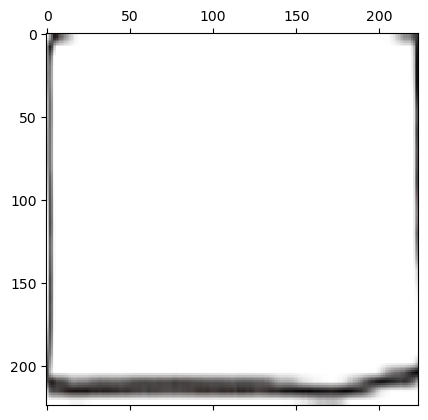

In [40]:
xtest1=xtest/255
plt.matshow(xtest1[5])
xtest1[0].shape


In [41]:
im_nikhil.shape

(727, 642, 3)

In [42]:
pred=model_nikhil.predict(xtest1)

1/1 [==============================] - 2s 2s/step


In [43]:
pred

array([[1.63887715e-04, 9.99745905e-01, 1.78865630e-05, 3.42746986e-08,
        7.23727062e-05, 4.30774172e-09],
       [4.34590947e-05, 2.28084801e-07, 2.81501435e-08, 5.68129765e-10,
        1.13294163e-05, 9.99944925e-01],
       [5.44130951e-02, 3.24693432e-11, 2.64398963e-03, 9.15851891e-01,
        2.70616226e-02, 2.93937319e-05],
       [9.99898076e-01, 9.94987713e-05, 7.78213494e-09, 7.67573644e-11,
        2.34211666e-06, 6.33368939e-16],
       [1.50885080e-05, 7.11860245e-14, 4.44221712e-07, 9.99984384e-01,
        7.70832287e-08, 2.10694899e-11],
       [4.13459213e-03, 9.77443993e-01, 6.06742338e-04, 4.90301943e-07,
        1.71586666e-02, 6.55516400e-04],
       [6.15650279e-05, 7.97837664e-12, 2.26118732e-06, 9.99935985e-01,
        2.01703145e-07, 5.06577974e-11],
       [1.21800427e-03, 3.44447630e-11, 1.16334180e-04, 9.98657346e-01,
        8.37010339e-06, 1.46967682e-09],
       [7.47931845e-05, 2.87080060e-12, 3.74006549e-06, 9.99920964e-01,
        5.12887425e-07, 

In [44]:
pp=np.argmax(pred,axis=1)
pp

array([1, 5, 3, 0, 3, 1, 3, 3, 3, 0, 3, 1, 1, 3, 0], dtype=int64)

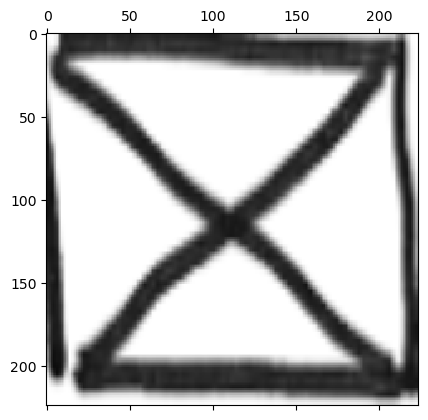

In [45]:
plt.matshow(xtest1[10])

In [46]:
guiw,guih=(im_nikhil.shape[1],im_nikhil.shape[0])
guih

727

In [47]:
websiteperdim=boxes*np.array([100/guiw,100/guih,100/guiw,100/guih])

In [48]:
boxes[5]



array([156, 243, 277, 283])

In [49]:
im_nikhil.shape

(727, 642, 3)

In [50]:
websiteperdim

array([[ 0.46728972, 33.01237964, 19.1588785 , 38.78954608],
       [15.57632399, 11.82943604, 55.91900312, 17.33149931],
       [15.88785047, 81.98074278, 23.20872274, 85.96973865],
       [49.37694704,  1.5130674 , 61.21495327,  7.84044017],
       [41.74454829, 82.94360385, 50.93457944, 87.8954608 ],
       [24.29906542, 33.42503439, 43.14641745, 38.92709766],
       [23.20872274, 43.05364512, 36.76012461, 50.48143054],
       [ 4.51713396, 42.91609354, 17.60124611, 50.20632737],
       [13.39563863,  0.13755158, 24.29906542,  6.18982118],
       [28.34890966, 93.9477304 , 39.40809969, 99.44979367],
       [25.85669782, 55.57083906, 39.09657321, 62.99862448],
       [ 0.15576324, 22.83356259, 19.47040498, 28.88583219],
       [24.29906542, 22.97111417, 43.30218069, 28.88583219],
       [ 5.29595016, 55.43328748, 18.69158879, 62.8610729 ],
       [48.75389408, 20.90784044, 98.75389408, 68.08803301]])

In [51]:
navbar=[]
div=[]
r=[]

In [52]:
import random
print(random.randint(1,2000))

128


In [53]:
b='id="{}"'.format(10)
str1='<div {} {}>'.format(b,20)
print(str1)

<div id="10" 20>


In [54]:
ids={}

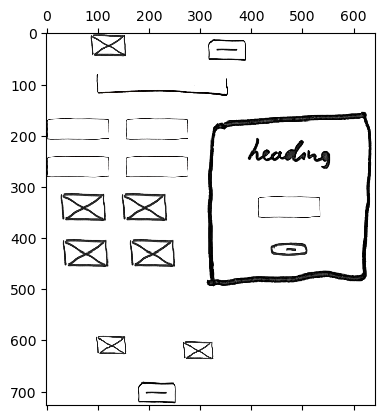

In [55]:
plt.matshow(im_nikhil)

In [56]:
def createview(x1,y1,x2,y2,ind,q,boxes,t1,n1,t2,n2):
    rid=random.randint(1,2000)
    ids[rid]=(t1,n1,t2,n2)
    
    
    
    b='id="{}"'.format(rid)
    
    s='style="position:absolute;left:{}%;top:{}%;width:{}%;height:{}%;"'.format(x1,y1,x2-x1,y2-y1)
    if(abs(y2-y1)>30):
            s='style="position:absolute;left:{}%;top:{}%;width:{}%;height:{}%;box-shadow: 1px 2px 4px lightgray;background-color:orange"'.format(x1,y1,x2-x1,y2-y1)
            str1='<div {} {}>'.format(b,s)
            im = cv2.imread(r'C:\Users\poni3001\Downloads\sketchtest.png')
            print("before",x1,y1,x2,y2)
            
            txx1,tyx1,txx2,tyx2=boxes[q][0],boxes[q][1],boxes[q][2],boxes[q][3] 
            print("after",txx1,tyx1,txx2,tyx2)
            im=im[int(tyx1)+50:int(tyx2)-50,int(txx1)+50:int(txx2)-50]
            plt.matshow(im)
            rects1_nikhil=[]



            ss_nikhil = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

            ss_nikhil.setBaseImage(im)


            ss_nikhil.switchToSelectiveSearchQuality()


            rects_nikhil = ss_nikhil.process()

            numShowRects_nikhil = 100
            increment = 50

            while True:
                imOut = im.copy()
                imOut1=im.copy()
                shapex,shapey,_=im.shape

                for i, rect in enumerate(rects_nikhil):
                    if (i < numShowRects_nikhil):
                        x, y, w, h = rect
                        if(w*h>0):
                            rects1_nikhil.append([x,y,w,h])
                            cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
                    else:
                        break
                cv2.imshow("Output", imOut)

                k = cv2.waitKey(0) & 0xFF

                if k == 109:
                    numShowRects_nikhil += increment
                elif k == 108 and numShowRects_nikhil > increment:
                    numShowRects_nikhil -= increment
                elif k == 113:
                    break
            cv2.destroyAllWindows()
            boxes=[]
            for i in rects_nikhil:
                a=[i[0],i[1],i[0]+i[2],i[1]+i[3]]
                a=np.array(a)
                boxes.append(a)
            boxes=np.array(boxes)
            boxes
            treshold=0.6
            
            if len(boxes) == 0:
                return []
            xx1 = boxes[:, 0]  
            yx1 = boxes[:, 1]  
            xx2 = boxes[:, 2]  
            yx2 = boxes[:, 3]  
            areas = (xx2 - xx1 + 1) * (yx2 - yx1 + 1) 
            indices = np.arange(len(xx1))
            for i,box in enumerate(boxes):
                temp_indices = indices[indices!=i]
                xx1 = np.maximum(box[0], boxes[temp_indices,0])
                yy1 = np.maximum(box[1], boxes[temp_indices,1])
                xx2 = np.minimum(box[2], boxes[temp_indices,2])
                yy2 = np.minimum(box[3], boxes[temp_indices,3])
                w = np.maximum(0, xx2 - xx1 + 1)
                h = np.maximum(0, yy2 - yy1 + 1)
                overlap = (w * h) / areas[temp_indices]
                if np.any(overlap) > treshold:
                    indices = indices[indices != i]
            boxes=boxes[indices].astype(int)
            innerxtest=[]
            for xx1, yx1, xx2, yx2 in boxes:
                xx1,yx1,xx2,yx2=xx1 , yx1 , xx2 , yx2
                """if(x1>1):
                    x1-=1
                if(x2<shapex-1):
                    x2+=1
                if(y1>1):
                    y1-=1
                if(y2<shapey-1):
                    y2+=1"""
                imgg=im[yx1:yx2,xx1:xx2]
                #plt.matshow(imgg)
                imgg=cv2.resize(imgg,(224,224))
                innerxtest.append(imgg)
            innerxtest=np.array(innerxtest)
            innerxtest1=innerxtest/255
            innerpred=model_nikhil.predict(innerxtest1)
            innerpp=np.argmax(innerpred,axis=1)
            guiw,guih=(im.shape[1],im.shape[0])
            boxes1=boxes*np.array([100/guiw,100/guih,100/guiw,100/guih])
            
            for i in range(len(boxes)):
                xx1, yx1, xx2, yx2 =boxes1[i][0],boxes1[i][1],boxes1[i][2],boxes1[i][3]
                ind=innerpp[i]
                q=i
                print("checking",txx1+boxes[i][0],tyx1+boxes[i][1],txx1+boxes[i][2],tyx1+boxes[i][3])
                
                
                str1+=createview(xx1,yx1,xx2,yx2,ind,q,boxes,txx1+boxes[i][0]+50,tyx1+boxes[i][1]+50,txx1+boxes[i][2]+50,tyx1+boxes[i][3]+50)
            str1+='</div>'
            return str1
                
                
    
    if(ind==0):
        s='style="position:absolute;left:{}%;top:{}%;padding:10px;background-color:green;color:white"'.format(x1,y1)
        return '<button {} {}>button - 1</button>'.format(b,s)
    if(ind==1):
        return '<input {} type="text" name="fname" placeholder="Firstname" {}>'.format(b,s)
        
            
            

            
            
    
    if(ind==10):
        return '<input {} type="checkbox" name="chk" value="Checkbox" {}>'.format(b,s)
    if(ind==3):
        s='style="position:absolute;left:{}%;top:{}%;"'.format(x1,y1)
        return '<img {} src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Face-smile.svg/2048px-Face-smile.svg.png" height=50px width=50px alt="Image not available" {}/>'.format(b,s)
    if(ind==33):
        return '<progress {} value = "65" max = "100" {}/>'.format(b,s)
    if(ind==4):
        s='style="position:absolute;left:{}%;top:{}%;"'.format(x1,y1,x2-x1,y2-y1)
        return '<h1 {} {}>Heading1</h1>'.format(b,s)
    if(ind==2):
        s='style="position:absolute;left:{}%;top:{}%;background-color:black;color:white"'.format(x1,y1)

        return '<button {} {}>  Click Here  </button>'.format(b,s)
    if(ind==5):
        st='<div {} style="position:absolute;left:2%;width:96%;top:2%;height:10%;background-color:white;box-shadow: 1px 2px 4px lightgray"></div>'.format(b)
        navbar.append(st)
    

In [76]:
print(websiteperdim)

[[ 0.46728972 33.01237964 19.1588785  38.78954608]
 [15.57632399 11.82943604 55.91900312 17.33149931]
 [15.88785047 81.98074278 23.20872274 85.96973865]
 [49.37694704  1.5130674  61.21495327  7.84044017]
 [41.74454829 82.94360385 50.93457944 87.8954608 ]
 [24.29906542 33.42503439 43.14641745 38.92709766]
 [23.20872274 43.05364512 36.76012461 50.48143054]
 [ 4.51713396 42.91609354 17.60124611 50.20632737]
 [13.39563863  0.13755158 24.29906542  6.18982118]
 [28.34890966 93.9477304  39.40809969 99.44979367]
 [25.85669782 55.57083906 39.09657321 62.99862448]
 [ 0.15576324 22.83356259 19.47040498 28.88583219]
 [24.29906542 22.97111417 43.30218069 28.88583219]
 [ 5.29595016 55.43328748 18.69158879 62.8610729 ]
 [48.75389408 20.90784044 98.75389408 68.08803301]]


before 48.75389408099688 20.90784044016506 98.75389408099687 68.08803301237964
after 313 152 634 495
1/1 [==============================] - 0s 357ms/step
checking 391 379 460 387
checking 344 157 458 202
checking 362 270 486 312
<div id="1930" style="position:absolute;left:2%;width:96%;top:2%;height:10%;background-color:white;box-shadow: 1px 2px 4px lightgray"></div>
<input id="1970" type="text" name="fname" placeholder="Firstname" style="position:absolute;left:0.46728971962616817%;top:33.012379642365886%;width:18.691588785046726%;height:5.7771664374140315%;">
<img id="1540" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Face-smile.svg/2048px-Face-smile.svg.png" height=50px width=50px alt="Image not available" style="position:absolute;left:15.887850467289718%;top:81.98074277854195%;"/>
<button id="716" style="position:absolute;left:49.376947040498436%;top:1.513067400275103%;padding:10px;background-color:green;color:white">button - 1</button>
<img id="238" src="https://u

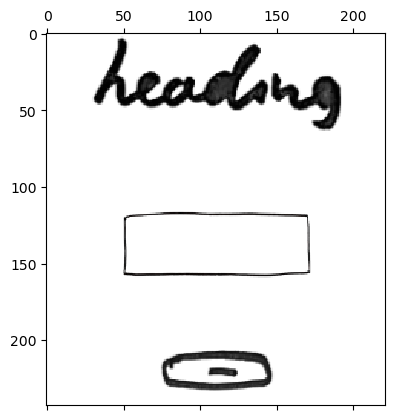

In [57]:
for i in range(len(websiteperdim)):
    
    
    t=pp[i]
    x1,y1,x2,y2=websiteperdim[i][0],websiteperdim[i][1],websiteperdim[i][2],websiteperdim[i][3] 
    view_posinds=t
    cc=createview(x1,y1,x2,y2,view_posinds,i,boxes,boxes[i][0],boxes[i][1],boxes[i][2],boxes[i][3])
    if(cc):
        r.append(cc)
st=""   
for i in navbar:
    st+=i
    print(i)
for i in r:
    st+=i
    print(i)

In [58]:
ids

{1970: (29, 312, 113, 365),
 1930: (100, 86, 359, 126),
 1540: (102, 596, 149, 625),
 716: (317, 11, 393, 57),
 238: (268, 603, 327, 639),
 678: (156, 243, 277, 283),
 1386: (149, 313, 236, 367),
 1681: (86, 1, 156, 45),
 1798: (182, 683, 253, 723),
 1948: (166, 404, 251, 458),
 1354: (1, 166, 125, 210),
 1427: (156, 167, 278, 210),
 1230: (34, 403, 120, 457),
 1516: (313, 152, 634, 495),
 435: (441, 429, 510, 437),
 1756: (394, 207, 508, 252),
 91: (412, 320, 536, 362)}

[1970, 1930, 1540, 716, 238, 678, 1386, 1681, 1798, 1948, 1354, 1427, 1230, 1516, 435, 1756, 91]


True

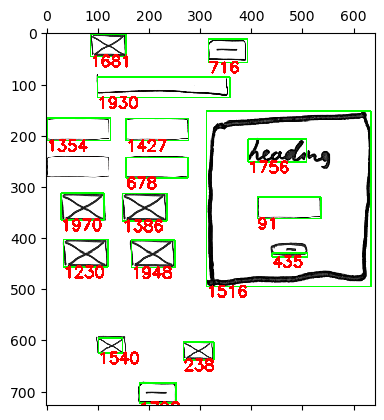

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
dup=[]
img=cv2.imread(r'C:\Users\poni3001\Downloads\sketchtest.png')
keys=list(ids.keys())
print(keys)
for key in keys[::-1]:
    if(ids[key] in dup):
        continue
    x1, y1 = int(ids[key][0]),int(ids[key][1])
    x2,y2=int(ids[key][2]),int(ids[key][3])
    width,height=x2-x1,y2-y1
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.rectangle(img, (x1, y1), (x2,y2), (0, 255, 0), 2)
    text = str(key)
    
    
    cv2.putText(img, text, (x1,y2+20), font, 1, (255, 0, 0), thickness=3)
    dup.append(ids[key])

plt.matshow(img)
cv2.imwrite(r'C:\Users\poni3001\Downloads\idsimage.jpg',img)






In [60]:
import matplotlib.pyplot as plt

In [61]:
data1=""""""

In [62]:
data1+=st

In [63]:
print(data1)

<div id="1930" style="position:absolute;left:2%;width:96%;top:2%;height:10%;background-color:white;box-shadow: 1px 2px 4px lightgray"></div><input id="1970" type="text" name="fname" placeholder="Firstname" style="position:absolute;left:0.46728971962616817%;top:33.012379642365886%;width:18.691588785046726%;height:5.7771664374140315%;"><img id="1540" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Face-smile.svg/2048px-Face-smile.svg.png" height=50px width=50px alt="Image not available" style="position:absolute;left:15.887850467289718%;top:81.98074277854195%;"/><button id="716" style="position:absolute;left:49.376947040498436%;top:1.513067400275103%;padding:10px;background-color:green;color:white">button - 1</button><img id="238" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Face-smile.svg/2048px-Face-smile.svg.png" height=50px width=50px alt="Image not available" style="position:absolute;left:41.744548286604356%;top:82.9436038514443%;"/><input id="678" ty

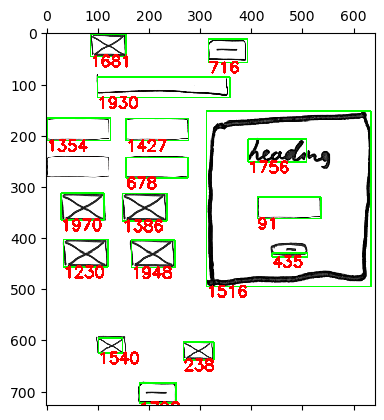

In [64]:
plt.matshow(img)

In [65]:
print(data1)

<div id="1930" style="position:absolute;left:2%;width:96%;top:2%;height:10%;background-color:white;box-shadow: 1px 2px 4px lightgray"></div><input id="1970" type="text" name="fname" placeholder="Firstname" style="position:absolute;left:0.46728971962616817%;top:33.012379642365886%;width:18.691588785046726%;height:5.7771664374140315%;"><img id="1540" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Face-smile.svg/2048px-Face-smile.svg.png" height=50px width=50px alt="Image not available" style="position:absolute;left:15.887850467289718%;top:81.98074277854195%;"/><button id="716" style="position:absolute;left:49.376947040498436%;top:1.513067400275103%;padding:10px;background-color:green;color:white">button - 1</button><img id="238" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Face-smile.svg/2048px-Face-smile.svg.png" height=50px width=50px alt="Image not available" style="position:absolute;left:41.744548286604356%;top:82.9436038514443%;"/><input id="678" ty

In [66]:
import re

In [67]:
def jscode(ind,data):
    print(ind,data)
    if(ind==0 and ('background' not in data[1])):
        str="document.getElementById"+"('"+data[0]+"')"+".onclick=function(){document.getElementById('"+data[0]+"')"+".style.color='"+data[2]+"'}"
    elif(ind==0):
        str="document.getElementById"+"('"+data[0]+"')"+".onclick=function(){document.getElementById('"+data[0]+"')"+".style.backgroundColor='"+data[2]+"'}"
    elif(ind==1 and ('background' not in data[1])):
        str="document.getElementById('"+data[0]+"')"+".style.color='"+data[2]+"'"
    elif(ind==1):
        str="document.getElementById('"+data[0]+"')"+".style.backgroundColor='"+data[2]+"'"
    elif(ind==2):
        str="document.getElementById"+"('"+data[0]+"')"+".onclick=function(){window.open('"+data[1]+"')}"
    elif(ind==8):
        str="document.getElementById('"+data[0]+"')"+".innerHTML='"+data[1]+"'"
    elif(ind==4):
        str="document.getElementById('"+data[0]+"').style.width=document.getElementById('"+data[0]+"').getBoundingClientRect().width"+(data[1]+data[2])+";"
        str+="document.getElementById('"+data[0]+"').style.height=document.getElementById('"+data[0]+"').getBoundingClientRect().height"+(data[3]+data[4])+";"
    elif(ind==5):
        str="document.getElementById('"+data[0]+"').style.top ='"+data[1]+"%';"
    elif(ind==6):
        str="document.getElementById('"+data[0]+"').style.left ='"+data[1]+"%';"
    elif(ind==7):
        str="document.getElementById('"+data+"').style.visibility='hidden'"
    elif(ind==3):
        str="document.getElementById('"+data[0]+"').placeholder = '"+data[1]+"'"
        

    return str

In [68]:
pattern=["click[a-z ]*id[a-z ]*(\d*)([a-z ]*)color[a-z ]* (red|blue|green|orange|yellow|purple|white|black)","[a-z ]*id[a-z ]*(\d*)([a-z ]*)color.*(red|blue|green|orange|yellow|purple|white|black)","click.*id[a-z ]*(\d*).* ([a-zA-Z0-9]*\.[a-z]*)",'[a-zA-Z ]*(\d*)[a-zA-Z ]*placeholder[a-zA-Z ]*"(.*)"',"id[a-z ]*(\d*) .*width .* (\+|-)(\d*) .* height .* (\+|-)(\d*)","[a-zA-Z ]*id[a-z ]*(\d*)[a-z ]*top[a-z ]*(\d*)","[a-zA-Z ]*id[a-z ]*(\d*)[a-z ]*left[a-z ]*(\d*)","remove[a-zA-Z ]*id[a-zA-Z ]*(\d*)",'.*id[a-z ]*(\\d*).*"(.*)"']

In [69]:
pattern[3]

'[a-zA-Z ]*(\\d*)[a-zA-Z ]*placeholder[a-zA-Z ]*"(.*)"'

In [70]:
'[a-zA-Z ]*(\d*)[a-zA-Z ]*placeholder[a-zA-Z ]*"(.*)"'

'[a-zA-Z ]*(\\d*)[a-zA-Z ]*placeholder[a-zA-Z ]*"(.*)"'

In [71]:
def text_trigger(text):
    for i in range(len(pattern)):
        if(re.findall(pattern[i],text)):
            return jscode(i,re.findall(pattern[i],text)[0])
            break
    else:
        raise "Nikhil error"
        

In [72]:
print(data1)

<div id="1930" style="position:absolute;left:2%;width:96%;top:2%;height:10%;background-color:white;box-shadow: 1px 2px 4px lightgray"></div><input id="1970" type="text" name="fname" placeholder="Firstname" style="position:absolute;left:0.46728971962616817%;top:33.012379642365886%;width:18.691588785046726%;height:5.7771664374140315%;"><img id="1540" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Face-smile.svg/2048px-Face-smile.svg.png" height=50px width=50px alt="Image not available" style="position:absolute;left:15.887850467289718%;top:81.98074277854195%;"/><button id="716" style="position:absolute;left:49.376947040498436%;top:1.513067400275103%;padding:10px;background-color:green;color:white">button - 1</button><img id="238" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Face-smile.svg/2048px-Face-smile.svg.png" height=50px width=50px alt="Image not available" style="position:absolute;left:41.744548286604356%;top:82.9436038514443%;"/><input id="678" ty

In [73]:
html = open(r'C:\Users\poni3001\Downloads\sketch.html', "w")
html.write(data1)

3538

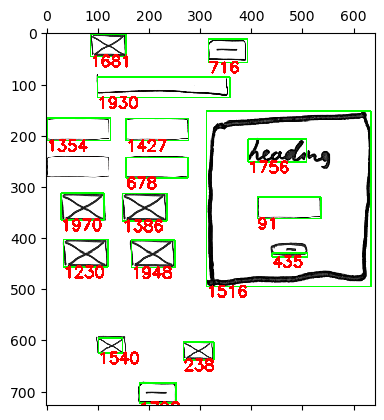

In [74]:
plt.matshow(img)

In [75]:
while(True):
    html = open(r'C:\Users\poni3001\Downloads\sketch.html', "w")
    html.write(data1)
    t=input("Enter text")
    
    try:
        temp="<script>{}</script>".format(text_trigger(t))
        data1+=temp
        html = open(r'C:\Users\poni3001\Downloads\sketch.html', "w")
        
        print("Successfully Changed")
        html.write(data1)
    except:
        print("Session Closed")
        break
    
    
    
    


        
    
    

    
    
    


KeyboardInterrupt: Interrupted by user

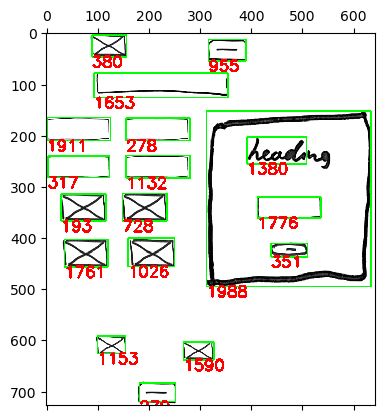

In [57]:
plt.matshow(img)

write id 1380 to "Login Form"
id 1380 from left to 30%
id 1776 from top to 30%
id 1776 from top to 40%
5 ('1776', '40')
Successfully Changed
Enter textid 1776 from top to 35%
5 ('1776', '35')
Successfully Changed
Enter textid 351 from top to 50%
5 ('351', '50')
Successfully Changed
Enter textid 351 from top to 60%
5 ('351', '60')
Successfully Changed
Enter textid 351 from left to 40%
6 ('351', '40')
Successfully Changed
Enter textwrite id 351 to "Submit Here"
3 ('351', 'Submit Here')
Successfully Changed
Enter textchange id 1988 background color to purple
1 ('1988', ' background ', 'purple')
Successfully Changed
Enter textchange id 1380 color to white
1 ('1380', ' ', 'white')
Successfully Changed
Enter textchange id 1776 background color to black
1 ('1776', ' background ', 'black')
Successfully Changed
Enter textchange id 1776 background color to white
1 ('1776', ' background ', 'white')
Successfully Changed
Enter textchange id 351 background color to black
1 ('351', ' background ', 'black')
Successfully Changed
Enter textchange id 351 width to +30 and height to +5
4 ('351', '+', '30', '+', '5')
Successfully Changed
Enter textid 1380 from left to 45%
6 ('1380', '45')
Successfully Changed
Enter textid 1380 from left to 42%
6 ('1380', '42')
Successfully Changed
Enter textid 1380 from left to 40%
6 ('1380', '40')
Successfully Changed
Enter textid 1380 from left to 35%
6 ('1380', '35')
Successfully Changed
Enter textchange id 1988 width to -30 and height to +0
4 ('1988', '-', '30', '+', '0')
Successfully Changed
Enter textchange id 1988 width to -50 and height to -10
4 ('1988', '-', '50', '-', '10')
Successfully Changed
Enter textid 1761 from left to 80%
6 ('1761', '80')
Successfully Changed
Enter textid 1761 from left to 10%
6 ('1761', '10')
Successfully Changed
Enter textid 1761 from left to 5%
6 ('1761', '5')
Successfully Changed
Enter textid 1153 from left to 80%
6 ('1153', '80')
Successfully Changed
Enter textid 1153 from left to 90%
6 ('1153', '90')
Successfully Changed
Enter textid 1153 from top to 20%
5 ('1153', '20')
Successfully Changed
Enter textid 1590 from left to 90%
6 ('1590', '90')
Successfully Changed
Enter textid 1153 from top to 60%
5 ('1153', '60')
Successfully Changed
Enter textid 1153 from top to 20%
5 ('1153', '20')
Successfully Changed
Enter textid 1590 from top to 20%
5 ('1590', '20')
Successfully Changed
Enter textid 1590 from top to 60%
5 ('1590', '60')
Successfully Changed
Enter textid 1761 from top to 30%
5 ('1761', '30')
Successfully Changed
Enter textid 1761 from left to 90%
6 ('1761', '90')
Successfully Changed
Enter textid 1026 from top to 40%
5 ('1026', '40')
Successfully Changed
Enter textid 1026 from left to 90%
6 ('1026', '90')
Successfully Changed
Enter textid 728 from left to 90%
6 ('728', '90')
Successfully Changed
Enter textid 728 from top to 50%
5 ('728', '50')
Successfully Changed
Enter textremove id 193
7 193
Successfully Changed
Enter textid 1911 from left to 30%
6 ('1911', '30')
Successfully Changed
Enter textid 1911 from left to 20%
6 ('1911', '20')
Successfully Changed
Enter textid 1911 from left to 15%
6 ('1911', '15')
Successfully Changed
Enter textid 278 from left to 15%
6 ('278', '15')
Successfully Changed
Enter textid 317 from left to 15%
6 ('317', '15')
Successfully Changed
Enter textid 1132 from left to 15%
6 ('1132', '15')
Successfully Changed
Enter textid 1911 from top to 20%
5 ('1911', '20')
Successfully Changed
Enter textid 278 from top to 30%
5 ('278', '30')
Successfully Changed
Enter textid 317 from top to 40%
5 ('317', '40')
Successfully Changed
Enter textid 1132 from top to 30%
5 ('1132', '30')
Successfully Changed
Enter textid 1132 from top to 50%
5 ('1132', '50')
Successfully Changed
Enter textchange id 279 background color to purple
1 ('279', ' background ', 'purple')
Successfully Changed
Enter textid 279 from top to 60%
5 ('279', '60')
Successfully Changed
Enter textid 279 from left to 20%
6 ('279', '20')
Successfully Changed
Enter textincrease id 279 width to +30 and height to +10
4 ('279', '+', '30', '+', '10')
Successfully Changed
Enter textwrite id 279 to "Submit New User Details"
3 ('279', 'Submit New User Details')
Successfully Changed
Enter textincrease id 279 width to +30 and height to +10
4 ('279', '+', '30', '+', '10')
Successfully Changed
Enter textincrease id 279 width to +30 and height to +0
4 ('279', '+', '30', '+', '0')
Successfully Changed
Enter textid 279 from left to 10%
6 ('279', '10')
Successfully Changed
Enter textid 279 from left to 15%
6 ('279', '15')
Successfully Changed
Enter textincrease id 279 width to +30 and height to +0
4 ('279', '+', '30', '+', '0')
Successfully Changed
Enter textincrease id 279 width to +90 and height to +0
4 ('279', '+', '90', '+', '0')
Successfully Changed
Enter textincrease id 279 width to -30 and height to +0
4 ('279', '-', '30', '+', '0')
Successfully Changed


In [27]:
html = open(r'C:\Users\poni3001\Downloads\sketch.html', "w")
t=data[0]
html.write(t)

4093

In [ ]:
[a-zA-Z]